# HPP model

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

random_state = 2023

In [3]:
human_scaled = pd.read_csv('human_rating_data/study2_modern/CHN_dim_rel_NLP_258r_33d_scaled_chi.csv',
                           index_col=0, encoding = 'gb18030')
print(human_scaled.shape)

(258, 33)


In [4]:
data = human_scaled
model = KMeans(3, random_state=random_state)
model.fit(data)
cluster_labels = model.fit_predict(data)

human_scaled_hpp = data
human_scaled_hpp['k3'] = cluster_labels
human_scaled_hpp.to_csv('human_rating_data/human_model/CHN_258r_hpp.csv')

In [5]:
raw_results = human_scaled_hpp
for n in range(len(raw_results['k3'].unique())):
    each_cluster = raw_results.index[raw_results['k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['k3']==n], sep = ", ")


Cluster 1 Relationship:55
债主-欠债人, 原配-第三者, 网友之间, 外地人-本地人, 乞丐-路人, 搭讪的人-被搭讪的人, 报案人-受害者, 罪犯-旁观者, 罪犯-被害人亲属, 忠臣-反贼, 小偷-失主, 嫌疑人-警察, 受害者-旁观者, 首领-反贼, 施害者-受害者, 胜者-败者, 前同事之间, 冠军-亚军, 官员-行贿者, 对手之间, 对立球队的球员之间, 赌徒之间, 毒贩-警察, 城管-摊贩, 报案人-罪犯, 霸凌者-受害者, 游客-本地人, 情敌之间, 陌生人之间, 对立球队的球迷之间, 出轨者-小三, 罪犯-受害人, 罪犯-警察, 肇事者-交警, 原告-被告, 艺人-黑粉, 前任官员-现任官员, 卖淫者-嫖客, 罪犯 - 人质, 罪犯 - 检察官, 原配-小三, 假朋友之间（表面朋友，实则讨厌对方）, 同一场体育比赛的对手之间（有正面交锋/比赛中的宿敌）, 体育竞赛的对手之间（不一定有正面交锋，比如预赛中不同的球队之间）, 受害者 - 目击者, 奴隶 - 奴隶主, 金主 - 援交男/女, 贩毒者 - 瘾君子, 认识但不熟的人之间, 离婚夫妇之间, 狱警-囚犯, 政治对手之间, 谈判中对立的双方, 生意竞争对手之间, 敌人之间

Cluster 2 Relationship:121
助教-学生, 学生会主席-学生会成员, 社团社长-社团社员, 老师-家长, 考官-考生, 家长-班主任, 家教-学生, 辅导员-大学生, 班主任-学生, 班委-班级成员, 主人-佣人, 主力-替补, 主管-助理, 主持人-观众, 主播-打赏者, 中介-客户, 政府官员-老百姓, 明星-经纪人, 演员-观众, 演员-编剧, 物业-业主, 外卖配送员-顾客, 图书管理员-读者, 售票员-乘客, 收银员-顾客, 收件人-快递员, 赛事解说员-观众, 人事工作人员-员工, 评委-选手, 评委-观众, 律师-检察官, 老员工-新员工, 老板-员工, 客服-顾客, 捐款人-受惠者, 居委会-居民, 教练-学员, 寄件人-快递员, 记者-采访对象, 黑帮老大-小弟, 管家-住户, 公务人员-办事人, 高级员工-低级员工, 法官-检察官, 队长-队员, 导演-编剧, 厨师-顾客, 乘务员-乘客, 编辑-作者, 保姆-雇主, 雇主-保镖, 保安-住户, 访客-前台, 

In [6]:
def cluster_rdm(cluster_results,cluster_model='k3'):
    dissim_cluster_result = pd.DataFrame(index = cluster_results.index,
                                         columns = cluster_results.index)
    for i in dissim_cluster_result.index:
        for j in dissim_cluster_result.columns:
            # cluster result was in the last column
            if cluster_results.loc[i,cluster_model] == cluster_results.loc[j,cluster_model]:
                dissim_cluster_result.loc[i,j] = 0
            else:
                dissim_cluster_result.loc[i,j] = 1
            dissim_cluster_result = dissim_cluster_result.astype(float)
            
    return(dissim_cluster_result)

In [6]:
hpp_sim = -cluster_rdm(human_scaled_hpp,'k3')
hpp_sim.to_csv('human_rating_data/human_model/sim_human_258r_hpp.csv',encoding='gb18030')

# FAVEE model

In [2]:
library(tidyverse)
library(ggplot2)
library(corrplot)
library(RColorBrewer)

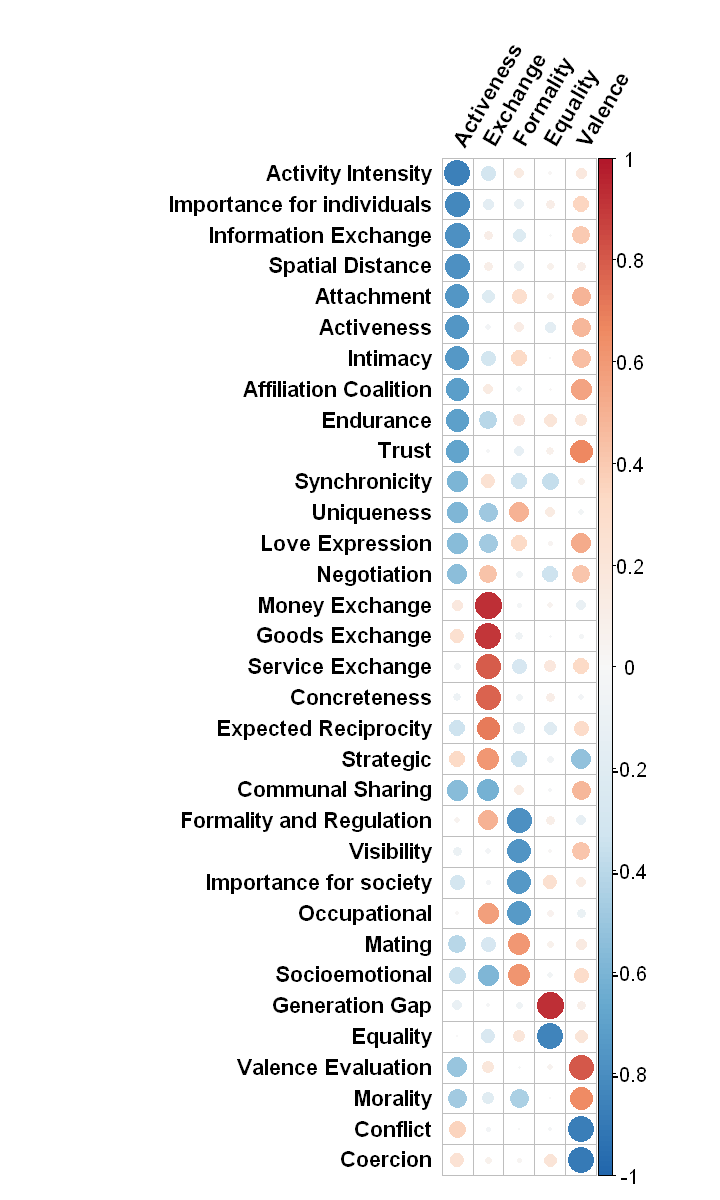

In [5]:
human_rating = read.csv('human_rating_data/study2_modern/CHN_dim_rel_NLP_258r_33d_scaled_chi.csv',
                       row.names = 1, check.names = FALSE, fileEncoding = 'gb18030')
dim_rel.pca = prcomp(human_rating)
ncomp = 5

loadings_none = dim_rel.pca$rotation[,1:ncomp]%*% diag(dim_rel.pca$sdev,ncomp,ncomp)
scores_none = dim_rel.pca$x[,1:ncomp] 

loadings_var = varimax(loadings_none)$loadings
scores_var = scale(scores_none) %*% varimax(loadings_none)$rotmat

loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])
#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(V1)
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(V2))
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(V3)
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(V4))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(V5))

loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

colnames(loadings_var_reorder) = c('Activeness','Exchange','Formality','Equality','Valence')
options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))

In [6]:
human_scores = data.frame(scores_var)
colnames(human_scores) = paste0(colnames(loadings_var_reorder),'.human')
human_scores['Activeness.human'] = -human_scores['Activeness.human']
human_scores['Formality.human'] = -human_scores['Formality.human']
human_scores['Equality.human'] = -human_scores['Equality.human']
write.csv(human_scores,'human_rating_data/human_model/CHN_258r_favee.csv')